In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt2d, correlate2d
from ipywidgets import interact, IntSlider, RadioButtons

### Suppose we want to remove scratches from this image. One way to implement is via median filter convolution

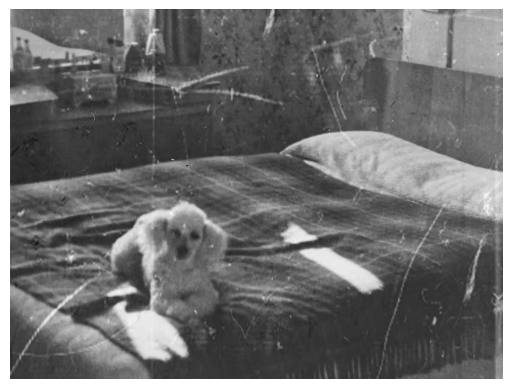

In [2]:
image = plt.imread('scatched photo.jpg')[:,:,0] /255
plt.axis('off')
plt.imshow(image, 'gray')

In [3]:
def sharpen(image, kernel_size, intensity, method):
    if method == '1':
        kernel = -1 * np.ones((kernel_size, kernel_size))
        kernel[kernel_size // 2, kernel_size // 2] = intensity
        matsum = np.sum(kernel)
        kernel /= matsum
        return np.clip(correlate2d(image, kernel, mode='same'),0, 1)
    
    return 2*image - correlate2d(image, np.ones((intensity,intensity))/intensity**2,'same')

def repair(sh_kernel_size, sh_intensity, sh_method, m_kernel_size):
    sharpened = sharpen(
        medfilt2d(image, m_kernel_size),
          sh_kernel_size, sh_intensity, sh_method)
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.imshow(image, 'gray')
    ax1.set_title('Original Image')
    ax1.axis('off')
    ax2.imshow(sharpened, 'gray')
    ax2.set_title('Sharpened Image')
    ax2.axis('off')
    plt.tight_layout()
    plt.show()

m_kernel_size_slider = IntSlider(min=1, max=33, step=2, value=3, description='Median Size:')
sh_kernel_size_slider = IntSlider(min=1, max=15, step=2, value=3, description='Sharpen Size:')
sh_intensity_slider = IntSlider(min=1, max=30, step=1, value=15, description='Sharpen Intensity:')
sh_method_radio = RadioButtons(options=['1', '2'], description='Sharpening Method:', value='1')

interact(repair, sh_kernel_size=sh_kernel_size_slider, sh_intensity=sh_intensity_slider, sh_method=sh_method_radio, m_kernel_size=m_kernel_size_slider)

interactive(children=(IntSlider(value=3, description='Sharpen Size:', max=15, min=1, step=2), IntSlider(value=…

<function __main__.repair(sh_kernel_size, sh_intensity, sh_method, m_kernel_size)>